In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import font_manager, rc
%matplotlib inline

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)


In [ ]:
# submission간 상관관계보기

cnn_sub = pd.read_csv('conv1d_submissions.csv', encoding='cp949')
dnn_sub = pd.read_csv('submission_dnn_nm.csv',encoding='cp949')
lstm_sub = pd.read_csv('bilstm_submissions.csv', encoding='cp949')
ae_sub = pd.read_csv('ae_0.7521_submissions.csv', encoding='cp949')

subs = pd.merge(cnn_sub, dnn_sub, on='cust_id')
subs = pd.merge(subs, lstm_sub, on='cust_id')
subs = pd.merge(subs, ae_sub, on='cust_id').drop('cust_id', axis=1)



In [3]:

score7880 = pd.read_csv('18logreg2(7880).csv',encoding='cp949') # 
score7644 = pd.read_csv('22(7644).csv',encoding='cp949') # 11
score7829 = pd.read_csv('22(7829).csv',encoding='cp949') # 12
score7782 = pd.read_csv('23(7782).csv',encoding='cp949') # 13
jun7830 = pd.read_csv('jun7830.csv', encoding='cp949') # 23
score7981 = pd.read_csv('박혜지(7981).csv', encoding='cp949') # 14
score7977 = pd.read_csv('서진영(7977).csv', encoding='cp949') # 18
score7988 = pd.read_csv('홍재성(7988).csv', encoding='cp949') # 19
w2v_nm_avg = pd.read_csv('submission_nm_w2v_avg.csv', encoding='cp949')
w2v_nm_stack = pd.read_csv('submission_nm_w2v_stack.csv', encoding='cp949')
w2v_7932 = pd.read_csv('김세홍(7932).csv', encoding='cp949')
w2v_7913 = pd.read_csv('권오현(7913).csv', encoding='cp949')
w2v_7883 = pd.read_csv('오주영(7883).csv', encoding='cp949')
w2vjun1 = pd.read_csv('w2v조민준1.csv', encoding='cp949')
w2vjun2 = pd.read_csv('w2v조민준2.csv', encoding='cp949')
w2vjun3 = pd.read_csv('w2v조민준3.csv', encoding='cp949')
w2vsong1 = pd.read_csv('w2v송민규1.csv', encoding='cp949')
w2vsong2 = pd.read_csv('w2v송민규2.csv', encoding='cp949')
w2vsong3 = pd.read_csv('w2v송민규3.csv', encoding='cp949')
cnn_sub = pd.read_csv('conv1d_submissions.csv', encoding='cp949')
dnn_sub = pd.read_csv('submission_dnn_nm.csv',encoding='cp949')
lstm_sub = pd.read_csv('bilstm_submissions.csv', encoding='cp949')
ae_sub = pd.read_csv('ae_0.7521_submissions.csv', encoding='cp949')


In [18]:
# score7849 = pd.read_csv('1차(7849).csv',encoding='cp949') # 1
# score7780 = pd.read_csv('18extra(7780).csv',encoding='cp949') # 2
# score7826 = pd.read_csv('18lgbm(7826).csv',encoding='cp949') # 3
# score7836 = pd.read_csv('18meta_voting(7836).csv',encoding='cp949') # 5
# score7756 = pd.read_csv('18xgb(7765).csv',encoding='cp949') # 6
# score7868 = pd.read_csv('20logreg3(7868).csv',encoding='cp949') # 7
# score7867 = pd.read_csv('20svm3(7867).csv',encoding='cp949') # 8
# score7860 = pd.read_csv('21(7860).csv',encoding='cp949') # 9
# score7861 = pd.read_csv('21(7861).csv',encoding='cp949') # 10

# score_avg = pd.read_csv('박혜지avg_submission.csv', encoding='cp949') # 15
# score_mean = pd.read_csv('박혜지mean_sub.csv', encoding='cp949') # 16
# score_ohe = pd.read_csv('박혜지ohe_sub.csv', encoding='cp949') # 17
# score_hong0 = pd.read_csv('홍재성#0.csv', encoding='cp949') # 20
# score_hong1 = pd.read_csv('홍재성#1.csv', encoding='cp949') # 21
# score_hong2 = pd.read_csv('홍재성#2(kmeans).csv', encoding='cp949') # 22

In [4]:
# gender 이름 바꾸기전

submissions = [score7880, score7644, score7829, score7782, score7981, score7977, score7988,
                jun7830, w2v_nm_avg, w2v_nm_stack, w2v_7932, w2v_7913, w2v_7883, w2vjun1, w2vjun2, w2vjun3, w2vsong1, w2vsong2, w2vsong3,
              cnn_sub, dnn_sub, lstm_sub, ae_sub
              ]

print(len(submissions))

names= ['score7880',  'score7644', 'score7829', 'score7782', 'score7981', 'score7977', 'score7988',
                'jun7830', 'w2v_nm_avg', 'w2v_nm_stack', 'w2v_7932', 'w2v_7913', 'w2v_7883', 'w2vjun1', 'w2vjun2', 'w2vjun3', 'w2vsong1', 'w2vsong2', 'w2vsong3',
        'cnn_sub', 'dnn_sub', 'lstm_sub', 'ae_sub'
       ]

23


In [8]:
# 각 submission별 gender 칼럼명 변경

for i in range(len(submissions)):

submissions[i].rename(columns={'gender':f'{names[i]}'}, inplace=True)


NameError: name 'submissions' is not defined

In [9]:
        n=1

        for submission in submissions:

            print(n); n +=1
    
    display(submission)

NameError: name 'submissions' is not defined

In [7]:
# 데이터 합치기

data = pd.DataFrame({'cust_id': range(3500,5982)})
for sub in submissions :
    data = pd.merge(data, sub, how='left', on='cust_id')
display(data)
data.info()

,cust_id,score7880,score7644,score7829,score7782,score7981,score7977,score7988,jun7830,w2v_nm_avg,...,w2vjun1,w2vjun2,w2vjun3,w2vsong1,w2vsong2,w2vsong3,cnn_sub,dnn_sub,lstm_sub,ae_sub
0,3500,0.793732,0.852839,0.825201,0.864903,0.703970,0.838103,0.743568,0.761307,0.649305,...,0.693207,0.724693,0.750313,0.740952,0.741465,0.725218,0.502320,0.778295,0.812798,0.791128
1,3501,0.214731,0.159199,0.143577,0.172053,0.261014,0.148406,0.361648,0.193536,0.241081,...,0.223757,0.198888,0.281079,0.168776,0.198546,0.176519,0.221761,0.210400,0.175747,0.188529
2,3502,0.132957,0.174014,0.163875,0.114289,0.223002,0.126179,0.198195,0.156237,0.260991,...,0.149401,0.265488,0.139427,0.227124,0.221245,0.277596,0.366076,0.139749,0.523913,0.273545
3,3503,0.158616,0.454851,0.305592,0.260816,0.298456,0.195933,0.207855,0.336666,0.345419,...,0.291356,0.283349,0.336574,0.251779,0.260553,0.240300,0.389048,0.169812,0.460342,0.286527
4,3504,0.311544,0.352049,0.383186,0.427416,0.477007,0.401645,0.396858,0.405982,0.400703,...,0.367839,0.338927,0.500502,0.296974,0.315189,0.544031,0.205193,0.267438,0.474943,0.495689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,5977,0.455184,0.612866,0.639911,0.578335,0.476866,0.585520,0.421573,0.494179,0.342199,...,0.334628,0.417356,0.356483,0.320474,0.363638,0.353020,0.557676,0.516476,0.591878,0.738398
2478,5978,0.288089,0.372244,0.408815,0.376874,0.397060,0.361859,0.404951,0.330115,0.292060,...,0.283816,0.286964,0.572095,0.274367,0.260629,0.332485,0.185885,0.382308,0.457559,0.395655
2479,5979,0.774292,0.889265,0.850050,0.699883,0.783580,0.742040,0.763675,0.763123,0.561198,...,0.654419,0.563893,0.643011,0.493818,0.593824,0.542444,0.273120,0.816023,0.804106,0.850639
2480,5980,0.453790,0.477837,0.491765,0.469846,0.425649,0.381033,0.578213,0.303355,0.508716,...,0.536756,0.402926,0.338150,0.434032,0.463658,0.398360,0.336597,0.276791,0.376468,0.414274


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2482 entries, 0 to 2481
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cust_id       2482 non-null   int64  
 1   score7880     2482 non-null   float64
 2   score7644     2482 non-null   float64
 3   score7829     2482 non-null   float64
 4   score7782     2482 non-null   float64
 5   score7981     2482 non-null   float64
 6   score7977     2482 non-null   float64
 7   score7988     2482 non-null   float64
 8   jun7830       2482 non-null   float64
 9   w2v_nm_avg    2482 non-null   float64
 10  w2v_nm_stack  2482 non-null   float64
 11  w2v_7932      2482 non-null   float64
 12  w2v_7913      2482 non-null   float64
 13  w2v_7883      2482 non-null   float64
 14  w2vjun1       2482 non-null   float64
 15  w2vjun2       2482 non-null   float64
 16  w2vjun3       2482 non-null   float64
 17  w2vsong1      2482 non-null   float64
 18  w2vsong2      2482 non-null 

In [8]:
data = data.drop('cust_id', axis=1); data

,score7880,score7644,score7829,score7782,score7981,score7977,score7988,jun7830,w2v_nm_avg,w2v_nm_stack,...,w2vjun1,w2vjun2,w2vjun3,w2vsong1,w2vsong2,w2vsong3,cnn_sub,dnn_sub,lstm_sub,ae_sub
0,0.793732,0.852839,0.825201,0.864903,0.703970,0.838103,0.743568,0.761307,0.649305,0.666824,...,0.693207,0.724693,0.750313,0.740952,0.741465,0.725218,0.502320,0.778295,0.812798,0.791128
1,0.214731,0.159199,0.143577,0.172053,0.261014,0.148406,0.361648,0.193536,0.241081,0.223262,...,0.223757,0.198888,0.281079,0.168776,0.198546,0.176519,0.221761,0.210400,0.175747,0.188529
2,0.132957,0.174014,0.163875,0.114289,0.223002,0.126179,0.198195,0.156237,0.260991,0.252344,...,0.149401,0.265488,0.139427,0.227124,0.221245,0.277596,0.366076,0.139749,0.523913,0.273545
3,0.158616,0.454851,0.305592,0.260816,0.298456,0.195933,0.207855,0.336666,0.345419,0.304667,...,0.291356,0.283349,0.336574,0.251779,0.260553,0.240300,0.389048,0.169812,0.460342,0.286527
4,0.311544,0.352049,0.383186,0.427416,0.477007,0.401645,0.396858,0.405982,0.400703,0.384296,...,0.367839,0.338927,0.500502,0.296974,0.315189,0.544031,0.205193,0.267438,0.474943,0.495689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,0.455184,0.612866,0.639911,0.578335,0.476866,0.585520,0.421573,0.494179,0.342199,0.385629,...,0.334628,0.417356,0.356483,0.320474,0.363638,0.353020,0.557676,0.516476,0.591878,0.738398
2478,0.288089,0.372244,0.408815,0.376874,0.397060,0.361859,0.404951,0.330115,0.292060,0.232964,...,0.283816,0.286964,0.572095,0.274367,0.260629,0.332485,0.185885,0.382308,0.457559,0.395655
2479,0.774292,0.889265,0.850050,0.699883,0.783580,0.742040,0.763675,0.763123,0.561198,0.583237,...,0.654419,0.563893,0.643011,0.493818,0.593824,0.542444,0.273120,0.816023,0.804106,0.850639
2480,0.453790,0.477837,0.491765,0.469846,0.425649,0.381033,0.578213,0.303355,0.508716,0.530210,...,0.536756,0.402926,0.338150,0.434032,0.463658,0.398360,0.336597,0.276791,0.376468,0.414274


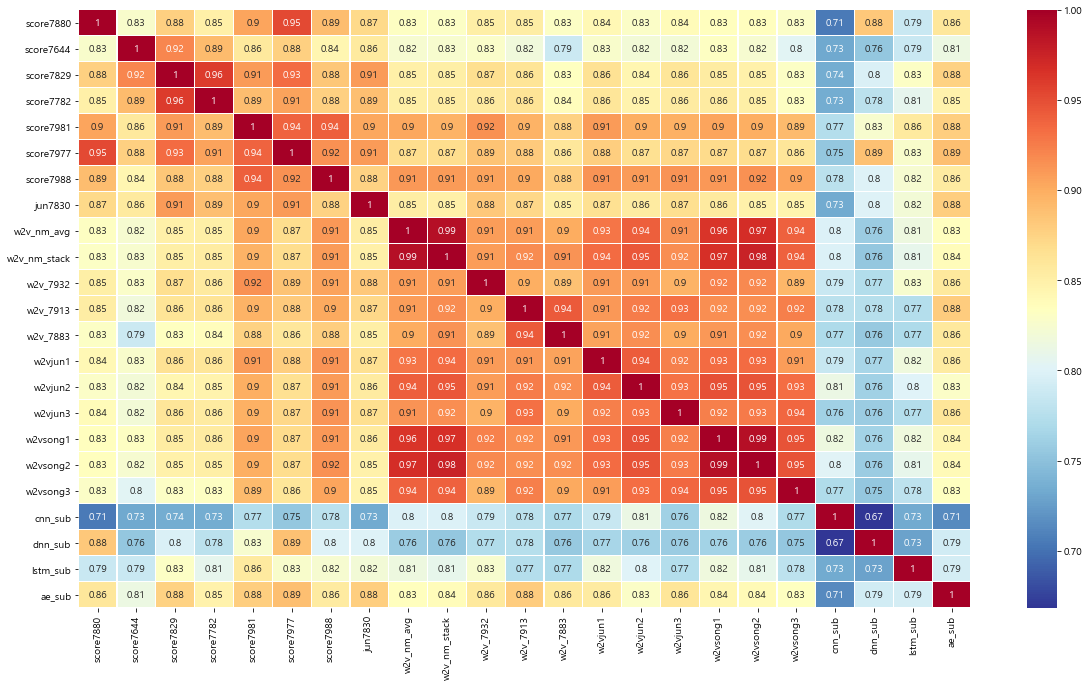

In [9]:
# 서브미션간 상관관계 히트맵

plt.figure(figsize=(20,11))
sns.heatmap(data.corr(), annot=True, cmap='RdYlBu_r', linewidths=0.2)
plt.show()

In [27]:
new_subs = ((data.corr() > 0.91).sum() < 7).reset_index().rename(columns={'index':'subs',0:'lowcorr'})
new_subs

,subs,lowcorr
0,score7849,True
1,score7780,False
2,score7826,False
3,score7880,False
4,score7836,False
5,score7756,False
6,score7868,False
7,score7867,False
8,score7860,False
9,score7861,False


In [31]:
new_subs_list = new_subs.query('lowcorr == True').subs.tolist()
new_subs_list

['score7849',
 'score7644',
 'score7829',
 'score7782',
 'score_avg',
 'score_mean',
 'score_hong0',
 'score_hong1',
 'score_hong2',
 'jun7830',
 'w2v_nm_avg',
 'w2v_nm_stack',
 'w2v_7932',
 'w2v_7913',
 'w2v_7883']

In [33]:
data[new_subs_list].corr()

,score7849,score7644,score7829,score7782,score_avg,score_mean,score_hong0,score_hong1,score_hong2,jun7830,w2v_nm_avg,w2v_nm_stack,w2v_7932,w2v_7913,w2v_7883
score7849,1.000000,0.809585,0.869784,0.851330,0.855806,0.908134,0.848717,0.948182,0.879901,0.853541,0.844610,0.843126,0.862275,0.869729,0.845553
score7644,0.809585,1.000000,0.920462,0.892325,0.840281,0.821125,0.799952,0.818219,0.831858,0.856347,0.824748,0.826222,0.828422,0.818541,0.788562
score7829,0.869784,0.920462,1.000000,0.960560,0.898413,0.864448,0.834953,0.878692,0.866211,0.910301,0.850366,0.851638,0.867627,0.861537,0.834039
score7782,0.851330,0.892325,0.960560,1.000000,0.870902,0.851309,0.831484,0.859682,0.861747,0.889028,0.851649,0.854687,0.856704,0.863329,0.836623
score_avg,0.855806,0.840281,0.898413,0.870902,1.000000,0.854664,0.821627,0.859208,0.835196,0.890618,0.834226,0.826938,0.860996,0.829119,0.817809
score_mean,0.908134,0.821125,0.864448,0.851309,0.854664,1.000000,0.877293,0.903362,0.912235,0.859300,0.887118,0.880135,0.891054,0.878680,0.849855
score_hong0,0.848717,0.799952,0.834953,0.831484,0.821627,0.877293,1.000000,0.860911,0.924007,0.828351,0.879001,0.877192,0.866968,0.852689,0.837053
score_hong1,0.948182,0.818219,0.878692,0.859682,0.859208,0.903362,0.860911,1.000000,0.889174,0.864477,0.853374,0.853961,0.878594,0.888558,0.862497
score_hong2,0.879901,0.831858,0.866211,0.861747,0.835196,0.912235,0.924007,0.889174,1.000000,0.860633,0.897920,0.898014,0.887079,0.886108,0.858555
jun7830,0.853541,0.856347,0.910301,0.889028,0.890618,0.859300,0.828351,0.864477,0.860633,1.000000,0.852977,0.850387,0.883046,0.871884,0.851086


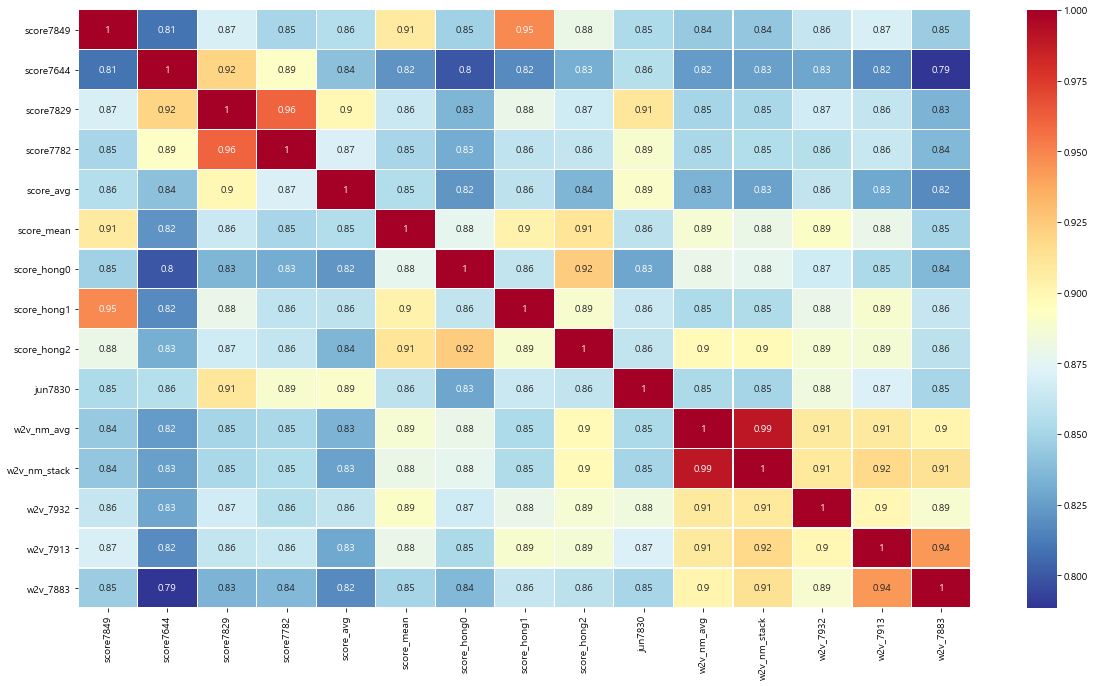

In [34]:
# 서브미션간 상관관계 히트맵

plt.figure(figsize=(20,11))
sns.heatmap(data[new_subs_list].corr(), annot=True, cmap='RdYlBu_r', linewidths=0.2)
plt.show()

In [35]:
# 그룹 과제1- 1,2,3등
# score7988
# score7981
# score7977

# 개인 과제2- 1,2,3등
# w2v_7932
# w2v_7913
# w2v_7883

bests = ['score7988', 'score7981', 'score7977', 'w2v_7932', 'w2v_7913', 'w2v_7883']

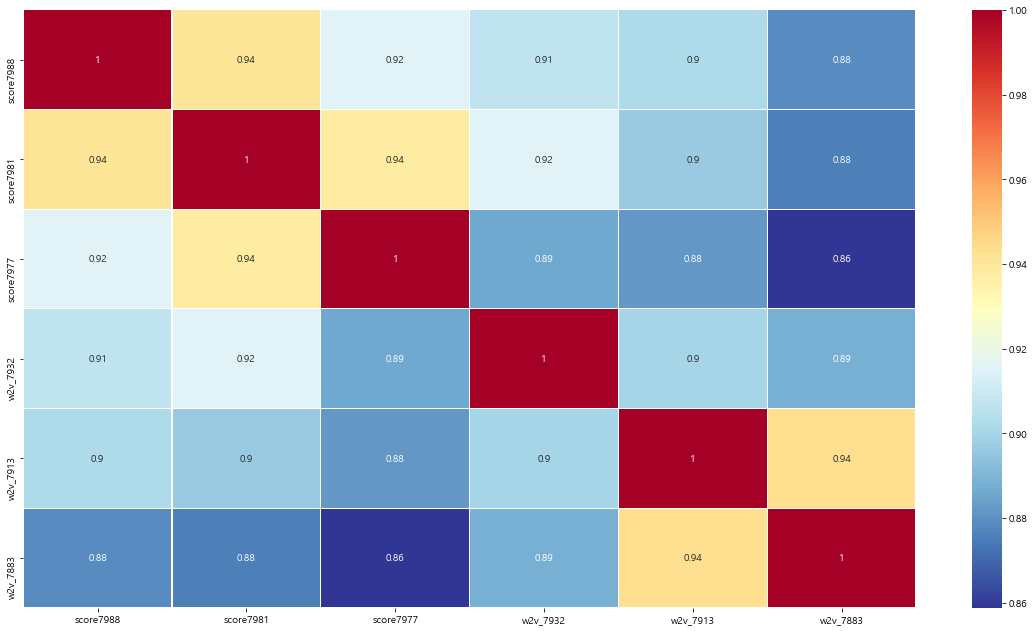

In [39]:
# 서브미션간 상관관계 히트맵

plt.figure(figsize=(20,11))
sns.heatmap(data[bests].corr(), annot=True, cmap='RdYlBu_r', linewidths=0.2)
plt.show()